In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import holidays


In [2]:
file_path ="C:/Users/melisa/Desktop/hackathon/dataset.xlsx"
data = pd.read_excel(file_path)

In [3]:
# Display the first few rows of the dataframe
print(data.head())


           TIME_STAMP           SERVER_NAME   DOWNLOAD   UPLOAD
0 2024-03-05 18:25:00  10.0.901.xx Server 1  11927.017  424.700
1 2024-03-05 18:20:00  10.0.901.xx Server 1  19703.467  525.575
2 2024-03-05 18:15:00  10.0.901.xx Server 1  26349.663  631.144
3 2024-03-05 18:10:00  10.0.901.xx Server 1  26068.494  623.673
4 2024-03-05 18:05:00  10.0.901.xx Server 1  25814.357  620.701


In [4]:
# Preprocess the data
def preprocess_data(df):
    # Handle missing values
    df = df.dropna()
    # Convert date column to datetime
    df['TIME_STAMP'] = pd.to_datetime(df['TIME_STAMP'])

    # Extract week day, hour, and minute
    df['week_day'] = df['TIME_STAMP'].dt.weekday
    df['hour'] = df['TIME_STAMP'].dt.hour
    df['minute'] = df['TIME_STAMP'].dt.minute
    
    # Mark weekends
    df['is_weekend'] = df['week_day'].apply(lambda x: 1 if x >= 5 else 0)
    
    # Mark holidays
    turkey_holidays = holidays.Turkey(years=df['TIME_STAMP'].dt.year.unique())
    df['is_holiday'] = df['TIME_STAMP'].apply(lambda x: 1 if x in turkey_holidays else 0)
    
    return df

data = preprocess_data(data)
print(data.head())


<ipython-input-4-7a366c26d52f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TIME_STAMP'] = pd.to_datetime(df['TIME_STAMP'])
<ipython-input-4-7a366c26d52f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_day'] = df['TIME_STAMP'].dt.weekday
<ipython-input-4-7a366c26d52f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

           TIME_STAMP           SERVER_NAME   DOWNLOAD   UPLOAD  week_day  \
0 2024-03-05 18:25:00  10.0.901.xx Server 1  11927.017  424.700         1   
1 2024-03-05 18:20:00  10.0.901.xx Server 1  19703.467  525.575         1   
2 2024-03-05 18:15:00  10.0.901.xx Server 1  26349.663  631.144         1   
3 2024-03-05 18:10:00  10.0.901.xx Server 1  26068.494  623.673         1   
4 2024-03-05 18:05:00  10.0.901.xx Server 1  25814.357  620.701         1   

   hour  minute  is_weekend  is_holiday  
0    18      25           0           0  
1    18      20           0           0  
2    18      15           0           0  
3    18      10           0           0  
4    18       5           0           0  


In [5]:
# Feature engineering
def create_features(df):
    df['day_of_year'] = df['TIME_STAMP'].dt.dayofyear
    df['week_of_year'] = df['TIME_STAMP'].dt.isocalendar().week
    return df

data = create_features(data)
print(data.head())


           TIME_STAMP           SERVER_NAME   DOWNLOAD   UPLOAD  week_day  \
0 2024-03-05 18:25:00  10.0.901.xx Server 1  11927.017  424.700         1   
1 2024-03-05 18:20:00  10.0.901.xx Server 1  19703.467  525.575         1   
2 2024-03-05 18:15:00  10.0.901.xx Server 1  26349.663  631.144         1   
3 2024-03-05 18:10:00  10.0.901.xx Server 1  26068.494  623.673         1   
4 2024-03-05 18:05:00  10.0.901.xx Server 1  25814.357  620.701         1   

   hour  minute  is_weekend  is_holiday  day_of_year  week_of_year  
0    18      25           0           0           65            10  
1    18      20           0           0           65            10  
2    18      15           0           0           65            10  
3    18      10           0           0           65            10  
4    18       5           0           0           65            10  


In [6]:
# Prepare the feature set
features = ['week_day', 'hour', 'minute', 'is_weekend', 'is_holiday', 'day_of_year', 'week_of_year']
X = data[features]

In [7]:
# Train the Isolation Forest model
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(X)


IsolationForest(contamination=0.01, random_state=42)

In [8]:
# Predict anomalies
data['anomaly'] = model.predict(X)
data['anomaly'] = data['anomaly'].apply(lambda x: 1 if x == -1 else 0)


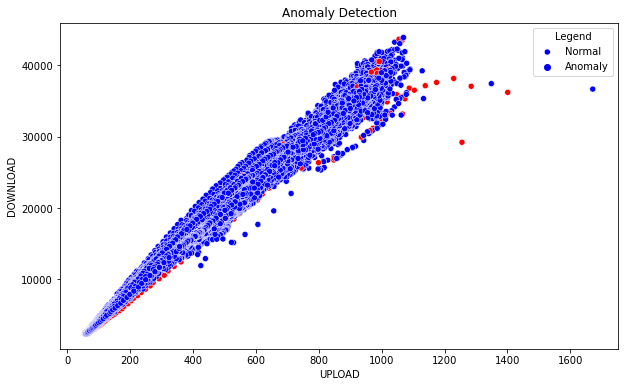

In [13]:

# Visualize anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='UPLOAD', y='DOWNLOAD', hue='anomaly', palette={0:'blue', 1:'red'})
plt.title('Anomaly Detection')
plt.xlabel('UPLOAD')
plt.ylabel('DOWNLOAD')
plt.legend(title='Legend', labels=['Normal', 'Anomaly'])
plt.show()

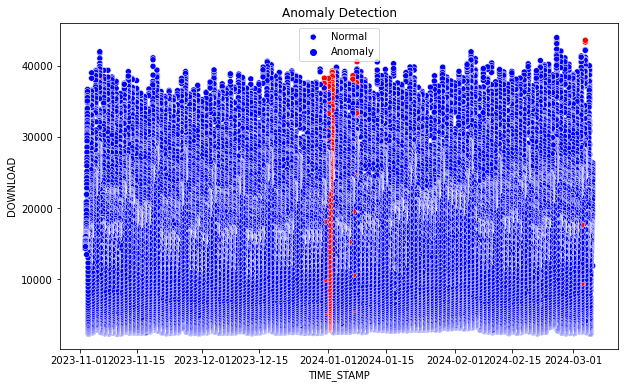

In [14]:
# Visualize anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='TIME_STAMP', y='DOWNLOAD', hue='anomaly', palette=['blue', 'red'])
plt.title('Anomaly Detection')
plt.xlabel('TIME_STAMP')
plt.ylabel('DOWNLOAD')
plt.legend(['Normal', 'Anomaly'])
plt.show()

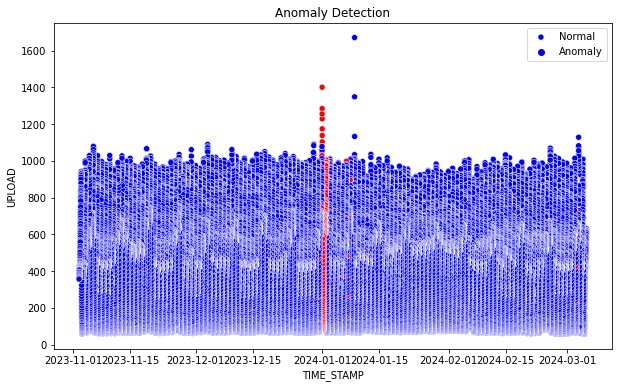

In [15]:

# Visualize anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='TIME_STAMP', y='UPLOAD', hue='anomaly', palette=['blue', 'red'])
plt.title('Anomaly Detection')
plt.xlabel('TIME_STAMP')
plt.ylabel('UPLOAD')
plt.legend(['Normal', 'Anomaly'])
plt.show()

In [16]:
# Check if the specific record is an anomaly
specific_record = data[data['TIME_STAMP'] == '2024-03-05 18:25:00']

print(specific_record)

           TIME_STAMP           SERVER_NAME   DOWNLOAD  UPLOAD  week_day  \
0 2024-03-05 18:25:00  10.0.901.xx Server 1  11927.017   424.7         1   

   hour  minute  is_weekend  is_holiday  day_of_year  week_of_year  anomaly  
0    18      25           0           0           65            10        0  


In [17]:
# Belirli bir tarihte anomali olup olmadığını kontrol etme fonksiyonu
def check_anomaly(date_str):
    specific_date = pd.to_datetime(date_str)
    specific_record = data[data['TIME_STAMP'] == specific_date]
    
    if specific_record.empty:
        print(f"{date_str} tarihine ait veri bulunamadı.")
    else:
        if specific_record['anomaly'].values[0] == 1:
            print(f"{date_str} tarihindeki kayıt bir anomali.")
        else:
            print(f"{date_str} tarihindeki kayıt normal.")

# Örnek kullanım
check_anomaly('2024-03-05 18:25:00')

2024-03-05 18:25:00 tarihindeki kayıt normal.
